In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2, ResNet50, VGG16, EfficientNetB0
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
# Paths
base_path = r"C:\Users\gajje\OneDrive\Desktop\Major\Lung_diagnosis_files\Dataset\Dataset\Dataset\round-2"
train_dir = os.path.join(base_path, "Training","90%Base")
test_dir = os.path.join(base_path, "Level1", "10%Base")


In [7]:
# Image size, batch size
img_size = (128, 128)
batch_size = 32
epochs = 10

In [8]:
# Image generators
datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_data = datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)

class_names = list(train_data.class_indices.keys())

Found 1051 images belonging to 3 classes.
Found 143 images belonging to 3 classes.


In [9]:
# Store results
results = {}

In [11]:
# Model List
models_to_train = {
    "Custom_CNN": None,
    "MobileNetV2": MobileNetV2(weights='imagenet', include_top=False, input_shape=(128,128,3)),
    "ResNet50": ResNet50(weights='imagenet', include_top=False, input_shape=(128,128,3)),
    "VGG16": VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3)),
    "EfficientNetB0": EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128,128,3))
}


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 84s 1us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 77s 5us/step


In [12]:
# Function to build model
def build_model(base=None):
    model = Sequential()
    if base:
        base.trainable = False
        model.add(base)
        model.add(GlobalAveragePooling2D())
    else:
        model.add(Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
        model.add(MaxPooling2D(2,2))
        model.add(Conv2D(64, (3,3), activation='relu'))
        model.add(MaxPooling2D(2,2))
        model.add(Conv2D(128, (3,3), activation='relu'))
        model.add(MaxPooling2D(2,2))
        model.add(Flatten())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(len(class_names), activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [13]:
# Train all models
for name, base_model in models_to_train.items():
    print(f"\nTraining model: {name}")
    model = build_model(base_model)
    history = model.fit(train_data, epochs=epochs, validation_data=test_data, verbose=1)

    # Evaluate
    loss, acc = model.evaluate(test_data, verbose=0)
    print(f"{name} Accuracy: {acc*100:.2f}%")
    
    # Predictions
    preds = model.predict(test_data)
    pred_labels = np.argmax(preds, axis=1)
    true_labels = test_data.classes

    cm = confusion_matrix(true_labels, pred_labels)
    report = classification_report(true_labels, pred_labels, target_names=class_names, output_dict=True)

    # Save results
    results[name] = {
        "Accuracy": acc,
        "Confusion Matrix": cm,
        "Report": report
    }


Training model: Custom_CNN


C:\Users\gajje\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\gajje\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 383ms/step - accuracy: 0.3212 - loss: 1.4408 - val_accuracy: 0.3636 - val_loss: 1.0981
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 288ms/step - accuracy: 0.3589 - loss: 1.0984 - val_accuracy: 0.4895 - val_loss: 1.0956
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 318ms/step - accuracy: 0.3987 - loss: 1.0938 - val_accuracy: 0.3986 - val_loss: 1.0715
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - accuracy: 0.5106 - loss: 1.0211 - val_accuracy: 0.7692 - val_loss: 0.8353
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 281ms/step - accuracy: 0.7416 - loss: 0.6998 - val_accuracy: 0.6364 - val_loss: 0.5830
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 274ms/step - accuracy: 0.7280 - loss: 0.5524 - val_accuracy: 0.8252 - val_loss: 0.5051
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 276ms/step - accuracy: 0.8879 - loss: 0.3480 - val_accuracy: 0.7902 - val_loss: 0.5461
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - accuracy: 0.8844 - loss: 0.2888 - val_accuracy

C:\Users\gajje\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gajje\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gajje\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

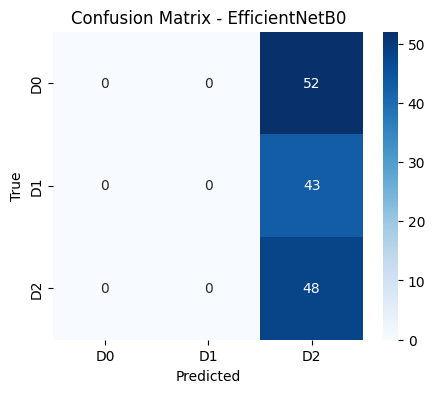

In [14]:
# Confusion matrix plot
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [15]:
# Summary Table
print("\n Summary Results:")
for model_name, result in results.items():
    print(f"{model_name}: Accuracy = {result['Accuracy']*100:.2f}%")



 Summary Results:
Custom_CNN: Accuracy = 88.81%
MobileNetV2: Accuracy = 56.64%
ResNet50: Accuracy = 43.36%
VGG16: Accuracy = 56.64%
EfficientNetB0: Accuracy = 33.57%
